In [44]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [2]:
CIFAR_DIR = 'cifar-10-batches-py/'

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding= 'bytes')
    return cifar_dict

In [4]:
dirs = ['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'test_batch']

In [5]:
all_data = [0,1,2,3,4,5,6]

In [6]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [7]:
batch_meta = all_data[0]
data_batch_1 = all_data[1]
data_batch_2 = all_data[2]
data_batch_3 = all_data[3]
data_batch_4 = all_data[4]
data_batch_5 = all_data[5]
test_data = all_data[6]

In [8]:
x1 = data_batch_1[b"data"]
x2 = data_batch_2[b"data"]
x3 = data_batch_3[b"data"]
x4 = data_batch_4[b"data"]
x5 = data_batch_5[b"data"]
x_test = test_data[b"data"]

In [9]:
y1 = np.asarray(data_batch_1[b"labels"])
y2 = np.asarray(data_batch_2[b"labels"])
y3 = np.asarray(data_batch_3[b"labels"])
y4 = np.asarray(data_batch_4[b"labels"])
y5 = np.asarray(data_batch_5[b"labels"])
y_test = np.asarray(test_data[b"labels"])

In [10]:
x_train = np.concatenate((x1, x2, x3, x4, x5), axis=0)
x = np.concatenate((x1, x2, x3, x4, x5, x_test), axis=0)

In [11]:
y_train = np.concatenate((y1, y2, y3, y4, y5), axis=0)
y = np.concatenate((y1, y2, y3, y4, y5, y_test), axis=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.astype(np.float32))
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32))
x_test_scaled = scaler.fit_transform(x_test.astype(np.float32))

In [13]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train_scaled)
dnn_clf_1 = tf.contrib.learn.DNNClassifier(hidden_units=[3072], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
dnn_clf_1 = tf.contrib.learn.SKCompat(dnn_clf_1) # to be compatible with sklearn
dnn_clf_1.fit(x_train_scaled, y_train, batch_size=50, steps=5000)

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpx3xusabd', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028116392400>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

SKCompat()

In [45]:
accuracy_1 = []

k_fold = KFold(n_splits=10)
for train_index, test_index in k_fold.split(x_train_scaled, y_train):
    X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    dnn_clf_1 = tf.contrib.learn.DNNClassifier(hidden_units=[3072], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
    dnn_clf_1 = tf.contrib.learn.SKCompat(dnn_clf_1) # to be compatible with sklearn
    dnn_clf_1.fit(X_train, Y_train, batch_size=50, steps=5000)
    
    Y_pred_1 = dnn_clf_1.predict(X_test)
    accuracy_1.append(accuracy_score(Y_test, Y_pred_1['classes']))
print("accuracy: ", accuracy_1)  
print("mean of accuracy: ", np.mean(accuracy_1))

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmprwcpfo22', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281188E98D0>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

INFO:tensorflow:step = 101, loss = 2.13186 (9.908 sec)
INFO:tensorflow:global_step/sec: 9.85652
INFO:tensorflow:step = 201, loss = 2.43211 (10.143 sec)
INFO:tensorflow:global_step/sec: 9.93045
INFO:tensorflow:step = 301, loss = 2.11367 (10.070 sec)
INFO:tensorflow:global_step/sec: 9.87508
INFO:tensorflow:step = 401, loss = 1.82085 (10.127 sec)
INFO:tensorflow:global_step/sec: 9.90486
INFO:tensorflow:step = 501, loss = 2.0158 (10.112 sec)
INFO:tensorflow:global_step/sec: 9.83321
INFO:tensorflow:step = 601, loss = 2.48414 (10.154 sec)
INFO:tensorflow:global_step/sec: 9.84825
INFO:tensorflow:step = 701, loss = 1.51878 (10.154 sec)
INFO:tensorflow:global_step/sec: 9.86102
INFO:tensorflow:step = 801, loss = 1.6613 (10.157 sec)
INFO:tensorflow:global_step/sec: 9.76611
INFO:tensorflow:step = 901, loss = 1.34877 (10.224 sec)
INFO:tensorflow:global_step/sec: 9.78402
INFO:tensorflow:step = 1001, loss = 1.88352 (10.221 sec)
INFO:tensorflow:global_step/sec: 9.6437
INFO:tensorflow:step = 1101, loss

INFO:tensorflow:global_step/sec: 9.86203
INFO:tensorflow:step = 1801, loss = 1.71504 (10.135 sec)
INFO:tensorflow:global_step/sec: 9.89845
INFO:tensorflow:step = 1901, loss = 1.24488 (10.118 sec)
INFO:tensorflow:global_step/sec: 9.9038
INFO:tensorflow:step = 2001, loss = 1.25301 (10.082 sec)
INFO:tensorflow:global_step/sec: 9.93963
INFO:tensorflow:step = 2101, loss = 1.45202 (10.061 sec)
INFO:tensorflow:global_step/sec: 8.71034
INFO:tensorflow:step = 2201, loss = 1.49233 (11.481 sec)
INFO:tensorflow:global_step/sec: 9.72946
INFO:tensorflow:step = 2301, loss = 1.44577 (10.282 sec)
INFO:tensorflow:global_step/sec: 9.89548
INFO:tensorflow:step = 2401, loss = 1.39194 (10.102 sec)
INFO:tensorflow:global_step/sec: 9.67881
INFO:tensorflow:step = 2501, loss = 1.56855 (10.332 sec)
INFO:tensorflow:global_step/sec: 9.85769
INFO:tensorflow:step = 2601, loss = 1.64719 (10.144 sec)
INFO:tensorflow:global_step/sec: 9.90014
INFO:tensorflow:step = 2701, loss = 1.63378 (10.101 sec)
INFO:tensorflow:globa

INFO:tensorflow:step = 3401, loss = 1.25541 (10.237 sec)
INFO:tensorflow:global_step/sec: 9.76012
INFO:tensorflow:step = 3501, loss = 1.63753 (10.246 sec)
INFO:tensorflow:global_step/sec: 9.60342
INFO:tensorflow:step = 3601, loss = 1.2607 (10.429 sec)
INFO:tensorflow:global_step/sec: 9.74528
INFO:tensorflow:step = 3701, loss = 1.55033 (10.246 sec)
INFO:tensorflow:global_step/sec: 9.77117
INFO:tensorflow:step = 3801, loss = 1.31874 (10.237 sec)
INFO:tensorflow:global_step/sec: 9.7639
INFO:tensorflow:step = 3901, loss = 1.36822 (10.254 sec)
INFO:tensorflow:global_step/sec: 9.79443
INFO:tensorflow:step = 4001, loss = 1.21539 (10.194 sec)
INFO:tensorflow:global_step/sec: 9.88357
INFO:tensorflow:step = 4101, loss = 1.27589 (10.118 sec)
INFO:tensorflow:global_step/sec: 9.77993
INFO:tensorflow:step = 4201, loss = 0.979674 (10.225 sec)
INFO:tensorflow:global_step/sec: 9.85052
INFO:tensorflow:step = 4301, loss = 1.31912 (10.167 sec)
INFO:tensorflow:global_step/sec: 9.74228
INFO:tensorflow:step 

INFO:tensorflow:Loss for final step: 1.2931.
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpevj2yw3m\model.ckpt-5000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpyeqvkm57', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281185C2BE0>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically

INFO:tensorflow:step = 1, loss = 2.8099
INFO:tensorflow:global_step/sec: 9.2004
INFO:tensorflow:step = 101, loss = 2.1338 (10.853 sec)
INFO:tensorflow:global_step/sec: 9.96016
INFO:tensorflow:step = 201, loss = 2.21403 (10.040 sec)
INFO:tensorflow:global_step/sec: 9.59029
INFO:tensorflow:step = 301, loss = 2.10939 (10.427 sec)
INFO:tensorflow:global_step/sec: 9.74806
INFO:tensorflow:step = 401, loss = 2.09313 (10.274 sec)
INFO:tensorflow:global_step/sec: 9.73986
INFO:tensorflow:step = 501, loss = 1.75596 (10.251 sec)
INFO:tensorflow:global_step/sec: 9.85657
INFO:tensorflow:step = 601, loss = 2.39844 (10.146 sec)
INFO:tensorflow:global_step/sec: 9.75967
INFO:tensorflow:step = 701, loss = 1.41295 (10.249 sec)
INFO:tensorflow:global_step/sec: 9.5502
INFO:tensorflow:step = 801, loss = 1.68021 (10.472 sec)
INFO:tensorflow:global_step/sec: 9.57755
INFO:tensorflow:step = 901, loss = 1.53124 (10.441 sec)
INFO:tensorflow:global_step/sec: 8.6759
INFO:tensorflow:step = 1001, loss = 1.86908 (11.52

INFO:tensorflow:step = 1701, loss = 1.77156 (10.215 sec)
INFO:tensorflow:global_step/sec: 9.83001
INFO:tensorflow:step = 1801, loss = 1.6857 (10.176 sec)
INFO:tensorflow:global_step/sec: 9.69321
INFO:tensorflow:step = 1901, loss = 1.15389 (10.329 sec)
INFO:tensorflow:global_step/sec: 9.54996
INFO:tensorflow:step = 2001, loss = 1.04213 (10.460 sec)
INFO:tensorflow:global_step/sec: 9.17653
INFO:tensorflow:step = 2101, loss = 1.23972 (10.893 sec)
INFO:tensorflow:global_step/sec: 9.77692
INFO:tensorflow:step = 2201, loss = 1.63762 (10.232 sec)
INFO:tensorflow:global_step/sec: 9.70606
INFO:tensorflow:step = 2301, loss = 1.43084 (10.299 sec)
INFO:tensorflow:global_step/sec: 9.78977
INFO:tensorflow:step = 2401, loss = 1.3449 (10.230 sec)
INFO:tensorflow:global_step/sec: 9.73797
INFO:tensorflow:step = 2501, loss = 1.58534 (10.269 sec)
INFO:tensorflow:global_step/sec: 9.73395
INFO:tensorflow:step = 2601, loss = 1.37294 (10.261 sec)
INFO:tensorflow:global_step/sec: 9.6464
INFO:tensorflow:step = 

INFO:tensorflow:global_step/sec: 9.77994
INFO:tensorflow:step = 3401, loss = 1.43183 (10.241 sec)
INFO:tensorflow:global_step/sec: 9.80621
INFO:tensorflow:step = 3501, loss = 1.4881 (10.198 sec)
INFO:tensorflow:global_step/sec: 9.74571
INFO:tensorflow:step = 3601, loss = 1.27901 (10.245 sec)
INFO:tensorflow:global_step/sec: 9.67149
INFO:tensorflow:step = 3701, loss = 1.03878 (10.340 sec)
INFO:tensorflow:global_step/sec: 9.61364
INFO:tensorflow:step = 3801, loss = 1.29576 (10.402 sec)
INFO:tensorflow:global_step/sec: 9.6081
INFO:tensorflow:step = 3901, loss = 1.09838 (10.408 sec)
INFO:tensorflow:global_step/sec: 9.5165
INFO:tensorflow:step = 4001, loss = 1.2326 (10.508 sec)
INFO:tensorflow:global_step/sec: 9.65545
INFO:tensorflow:step = 4101, loss = 1.32213 (10.372 sec)
INFO:tensorflow:global_step/sec: 9.61062
INFO:tensorflow:step = 4201, loss = 1.59105 (10.390 sec)
INFO:tensorflow:global_step/sec: 9.66915
INFO:tensorflow:step = 4301, loss = 1.39089 (10.342 sec)
INFO:tensorflow:global_s

INFO:tensorflow:Loss for final step: 1.58175.
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpy4cio3ln\model.ckpt-5000
accuracy:  [0.49299999999999999, 0.48220000000000002, 0.49280000000000002, 0.49259999999999998, 0.50519999999999998, 0.48559999999999998, 0.47120000000000001, 0.50900000000000001, 0.49159999999999998, 0.49199999999999999]
mean of accuracy:  0.49152


In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score 
y_pred_1 = dnn_clf_1.predict(x_test_scaled)
print(y_pred_1.keys())
accuracy_score(y_test, y_pred_1['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpx3xusabd\model.ckpt-5000
dict_keys(['classes', 'logits', 'probabilities'])


0.50939999999999996

In [15]:
print(classification_report(y_test,y_pred_1['classes']))

             precision    recall  f1-score   support

          0       0.68      0.41      0.51      1000
          1       0.61      0.64      0.62      1000
          2       0.42      0.46      0.44      1000
          3       0.48      0.10      0.16      1000
          4       0.45      0.45      0.45      1000
          5       0.39      0.58      0.46      1000
          6       0.56      0.56      0.56      1000
          7       0.56      0.64      0.59      1000
          8       0.46      0.79      0.58      1000
          9       0.68      0.47      0.55      1000

avg / total       0.53      0.51      0.49     10000



In [16]:
confusion_matrix(y_test, y_pred_1['classes'])

array([[414,  35,  75,   3,  46,  29,  31,  50, 279,  38],
       [ 17, 639,  24,   7,  13,  11,  25,  16, 166,  82],
       [ 45,  18, 459,  16, 126, 135,  63,  84,  50,   4],
       [ 22,  27, 110,  99,  78, 363, 125,  62,  94,  20],
       [ 23,  22, 153,  12, 450, 106,  59, 104,  63,   8],
       [ 10,  12,  76,  40,  64, 578,  55,  85,  72,   8],
       [ 10,  22,  99,  13, 116,  91, 564,  23,  50,  12],
       [ 13,  19,  54,   7,  71, 127,  24, 635,  32,  18],
       [ 35,  50,  19,   0,  24,  18,  14,  22, 788,  30],
       [ 24, 201,  30,  10,  18,  35,  40,  58, 116, 468]], dtype=int64)

In [17]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train_scaled)
dnn_clf_2 = tf.contrib.learn.DNNClassifier(hidden_units=[1000,1000], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
dnn_clf_2 = tf.contrib.learn.SKCompat(dnn_clf_2) # to be compatible with sklearn
dnn_clf_2.fit(x_train_scaled, y_train, batch_size=50, steps=5000)

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpbkugotm4', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811B1B3400>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

SKCompat()

In [46]:
accuracy_2 = []

k_fold = KFold(n_splits=10)
for train_index, test_index in k_fold.split(x_train_scaled, y_train):
    X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    dnn_clf_2 = tf.contrib.learn.DNNClassifier(hidden_units=[1000,1000], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
    dnn_clf_2 = tf.contrib.learn.SKCompat(dnn_clf_2) # to be compatible with sklearn
    dnn_clf_2.fit(X_train, Y_train, batch_size=50, steps=5000)
    
    Y_pred_2 = dnn_clf_2.predict(X_test)
    accuracy_2.append(accuracy_score(Y_test, Y_pred_2['classes']))
print("accuracy: ", accuracy_2)  
print("mean of accuracy: ", np.mean(accuracy_2))

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmppjq96n6z', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028118B97E80>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

INFO:tensorflow:global_step/sec: 22.2902
INFO:tensorflow:step = 201, loss = 1.82129 (4.497 sec)
INFO:tensorflow:global_step/sec: 21.8407
INFO:tensorflow:step = 301, loss = 1.89684 (4.579 sec)
INFO:tensorflow:global_step/sec: 21.3888
INFO:tensorflow:step = 401, loss = 1.72511 (4.660 sec)
INFO:tensorflow:global_step/sec: 22.1599
INFO:tensorflow:step = 501, loss = 1.8071 (4.513 sec)
INFO:tensorflow:global_step/sec: 21.3685
INFO:tensorflow:step = 601, loss = 2.02575 (4.680 sec)
INFO:tensorflow:global_step/sec: 22.1841
INFO:tensorflow:step = 701, loss = 1.48047 (4.508 sec)
INFO:tensorflow:global_step/sec: 21.8792
INFO:tensorflow:step = 801, loss = 1.49899 (4.571 sec)
INFO:tensorflow:global_step/sec: 22.2919
INFO:tensorflow:step = 901, loss = 1.36146 (4.502 sec)
INFO:tensorflow:global_step/sec: 21.915
INFO:tensorflow:step = 1001, loss = 1.54796 (4.553 sec)
INFO:tensorflow:global_step/sec: 22.1324
INFO:tensorflow:step = 1101, loss = 1.28357 (4.512 sec)
INFO:tensorflow:global_step/sec: 22.2925

INFO:tensorflow:global_step/sec: 22.4404
INFO:tensorflow:step = 1901, loss = 1.04233 (4.472 sec)
INFO:tensorflow:global_step/sec: 22.1301
INFO:tensorflow:step = 2001, loss = 1.2207 (4.503 sec)
INFO:tensorflow:global_step/sec: 22.4647
INFO:tensorflow:step = 2101, loss = 1.2719 (4.467 sec)
INFO:tensorflow:global_step/sec: 20.9884
INFO:tensorflow:step = 2201, loss = 1.34943 (4.765 sec)
INFO:tensorflow:global_step/sec: 20.3741
INFO:tensorflow:step = 2301, loss = 1.29379 (4.893 sec)
INFO:tensorflow:global_step/sec: 20.225
INFO:tensorflow:step = 2401, loss = 1.24892 (4.960 sec)
INFO:tensorflow:global_step/sec: 21.4262
INFO:tensorflow:step = 2501, loss = 1.44049 (4.652 sec)
INFO:tensorflow:global_step/sec: 18.241
INFO:tensorflow:step = 2601, loss = 1.45897 (5.498 sec)
INFO:tensorflow:global_step/sec: 18.8461
INFO:tensorflow:step = 2701, loss = 1.39643 (5.291 sec)
INFO:tensorflow:global_step/sec: 22.0054
INFO:tensorflow:step = 2801, loss = 1.22093 (4.544 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 20.3848
INFO:tensorflow:step = 3601, loss = 1.08021 (4.906 sec)
INFO:tensorflow:global_step/sec: 22.0358
INFO:tensorflow:step = 3701, loss = 1.0748 (4.538 sec)
INFO:tensorflow:global_step/sec: 22.2315
INFO:tensorflow:step = 3801, loss = 0.948747 (4.518 sec)
INFO:tensorflow:global_step/sec: 22.2664
INFO:tensorflow:step = 3901, loss = 1.00419 (4.471 sec)
INFO:tensorflow:global_step/sec: 22.5299
INFO:tensorflow:step = 4001, loss = 1.03416 (4.444 sec)
INFO:tensorflow:global_step/sec: 22.1154
INFO:tensorflow:step = 4101, loss = 1.29887 (4.532 sec)
INFO:tensorflow:global_step/sec: 22.181
INFO:tensorflow:step = 4201, loss = 0.774423 (4.493 sec)
INFO:tensorflow:global_step/sec: 21.8521
INFO:tensorflow:step = 4301, loss = 1.13102 (4.577 sec)
INFO:tensorflow:global_step/sec: 22.2228
INFO:tensorflow:step = 4401, loss = 1.19973 (4.505 sec)
INFO:tensorflow:global_step/sec: 22.5437
INFO:tensorflow:step = 4501, loss = 0.662195 (4.445 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp0amq6kd6', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811A450A90>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

INFO:tensorflow:global_step/sec: 22.1736
INFO:tensorflow:step = 301, loss = 1.65417 (4.525 sec)
INFO:tensorflow:global_step/sec: 22.1677
INFO:tensorflow:step = 401, loss = 1.82369 (4.495 sec)
INFO:tensorflow:global_step/sec: 21.4254
INFO:tensorflow:step = 501, loss = 1.61649 (4.667 sec)
INFO:tensorflow:global_step/sec: 19.9136
INFO:tensorflow:step = 601, loss = 1.72604 (5.022 sec)
INFO:tensorflow:global_step/sec: 21.3269
INFO:tensorflow:step = 701, loss = 1.37052 (4.708 sec)
INFO:tensorflow:global_step/sec: 22.1644
INFO:tensorflow:step = 801, loss = 1.6157 (4.509 sec)
INFO:tensorflow:global_step/sec: 22.1391
INFO:tensorflow:step = 901, loss = 1.27874 (4.501 sec)
INFO:tensorflow:global_step/sec: 22.4969
INFO:tensorflow:step = 1001, loss = 1.58845 (4.461 sec)
INFO:tensorflow:global_step/sec: 22.1555
INFO:tensorflow:step = 1101, loss = 1.5453 (4.514 sec)
INFO:tensorflow:global_step/sec: 21.9913
INFO:tensorflow:step = 1201, loss = 1.40104 (4.532 sec)
INFO:tensorflow:global_step/sec: 20.941

INFO:tensorflow:global_step/sec: 21.4901
INFO:tensorflow:step = 2001, loss = 0.889481 (4.653 sec)
INFO:tensorflow:global_step/sec: 22.1411
INFO:tensorflow:step = 2101, loss = 1.19185 (4.532 sec)
INFO:tensorflow:global_step/sec: 22.1411
INFO:tensorflow:step = 2201, loss = 1.37301 (4.501 sec)
INFO:tensorflow:global_step/sec: 22.3873
INFO:tensorflow:step = 2301, loss = 1.47946 (4.482 sec)
INFO:tensorflow:global_step/sec: 22.1994
INFO:tensorflow:step = 2401, loss = 1.06397 (4.495 sec)
INFO:tensorflow:global_step/sec: 22.1492
INFO:tensorflow:step = 2501, loss = 1.36508 (4.509 sec)
INFO:tensorflow:global_step/sec: 22.2885
INFO:tensorflow:step = 2601, loss = 1.15921 (4.502 sec)
INFO:tensorflow:global_step/sec: 22.1513
INFO:tensorflow:step = 2701, loss = 1.56862 (4.499 sec)
INFO:tensorflow:global_step/sec: 21.2894
INFO:tensorflow:step = 2801, loss = 1.26946 (4.703 sec)
INFO:tensorflow:global_step/sec: 22.2672
INFO:tensorflow:step = 2901, loss = 1.02663 (4.485 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 21.872
INFO:tensorflow:step = 3701, loss = 0.856969 (4.572 sec)
INFO:tensorflow:global_step/sec: 22.3066
INFO:tensorflow:step = 3801, loss = 1.11307 (4.483 sec)
INFO:tensorflow:global_step/sec: 22.1443
INFO:tensorflow:step = 3901, loss = 1.27237 (4.516 sec)
INFO:tensorflow:global_step/sec: 22.2715
INFO:tensorflow:step = 4001, loss = 1.00939 (4.495 sec)
INFO:tensorflow:global_step/sec: 21.3196
INFO:tensorflow:step = 4101, loss = 0.962203 (4.701 sec)
INFO:tensorflow:global_step/sec: 21.1992
INFO:tensorflow:step = 4201, loss = 1.13981 (4.717 sec)
INFO:tensorflow:global_step/sec: 20.729
INFO:tensorflow:step = 4301, loss = 0.94276 (4.824 sec)
INFO:tensorflow:global_step/sec: 21.3658
INFO:tensorflow:step = 4401, loss = 0.922998 (4.681 sec)
INFO:tensorflow:global_step/sec: 21.9294
INFO:tensorflow:step = 4501, loss = 0.826223 (4.544 sec)
INFO:tensorflow:global_step/sec: 22.0609
INFO:tensorflow:step = 4601, loss = 0.907259 (4.533 sec)
INFO:tensorflow:global_step

In [18]:
y_pred_2 = dnn_clf_2.predict(x_test_scaled)
print(y_pred_2.keys())
accuracy_score(y_test, y_pred_2['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpbkugotm4\model.ckpt-5000
dict_keys(['classes', 'logits', 'probabilities'])


0.53090000000000004

In [19]:
print(classification_report(y_test,y_pred_2['classes']))

             precision    recall  f1-score   support

          0       0.57      0.56      0.56      1000
          1       0.63      0.63      0.63      1000
          2       0.40      0.46      0.43      1000
          3       0.38      0.31      0.34      1000
          4       0.46      0.45      0.45      1000
          5       0.46      0.49      0.47      1000
          6       0.58      0.58      0.58      1000
          7       0.67      0.59      0.63      1000
          8       0.55      0.73      0.62      1000
          9       0.65      0.51      0.57      1000

avg / total       0.53      0.53      0.53     10000



In [20]:
confusion_matrix(y_test, y_pred_2['classes'])

array([[561,  33,  79,  24,  32,  14,  27,  15, 189,  26],
       [ 68, 626,  29,  13,  11,  12,  10,  18, 109, 104],
       [ 78,  16, 464,  82, 119,  81,  72,  44,  38,   6],
       [ 29,  17, 122, 308,  63, 222, 117,  32,  56,  34],
       [ 39,  14, 172,  58, 447,  76,  77,  66,  36,  15],
       [ 19,  10, 101, 148,  57, 493,  59,  58,  40,  15],
       [  6,  20,  96,  73, 112,  52, 578,  15,  28,  20],
       [ 42,  13,  59,  52,  88,  92,  22, 593,  21,  18],
       [ 91,  58,  25,  16,  18,  18,   6,   8, 728,  32],
       [ 56, 184,  26,  30,  23,  18,  26,  36,  90, 511]], dtype=int64)

In [25]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# set the random seed for tensorflow initializers(for consistency between reruns)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train_scaled)
dnn_clf_3 = tf.contrib.learn.DNNClassifier(hidden_units=[1500,1500,1000,500], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
dnn_clf_3 = tf.contrib.learn.SKCompat(dnn_clf_3) # to be compatible with sklearn
dnn_clf_3.fit(x_train_scaled, y_train, batch_size=50, steps=5000)

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpyd6u51sr', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811763DF60>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

SKCompat()

In [47]:
accuracy_3 = []

k_fold = KFold(n_splits=10)
for train_index, test_index in k_fold.split(x_train_scaled, y_train):
    X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 

    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    dnn_clf_3 = tf.contrib.learn.DNNClassifier(hidden_units=[1500,1500,1000,500], activation_fn = tf.nn.relu, n_classes=10, feature_columns=feature_columns, config=config)
    dnn_clf_3 = tf.contrib.learn.SKCompat(dnn_clf_3) # to be compatible with sklearn
    dnn_clf_3.fit(X_train, Y_train, batch_size=50, steps=5000)
    
    Y_pred_3 = dnn_clf_3.predict(X_test)
    accuracy_3.append(accuracy_score(Y_test, Y_pred_3['classes']))
print("accuracy: ", accuracy_3)  
print("mean of accuracy: ", np.mean(accuracy_3))

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp2fugsqyp', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028119CAB550>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

INFO:tensorflow:step = 101, loss = 1.69268 (10.451 sec)
INFO:tensorflow:global_step/sec: 10.007
INFO:tensorflow:step = 201, loss = 1.88324 (9.984 sec)
INFO:tensorflow:global_step/sec: 10.3396
INFO:tensorflow:step = 301, loss = 1.84749 (9.677 sec)
INFO:tensorflow:global_step/sec: 9.43489
INFO:tensorflow:step = 401, loss = 1.74334 (10.610 sec)
INFO:tensorflow:global_step/sec: 9.98974
INFO:tensorflow:step = 501, loss = 1.8377 (9.995 sec)
INFO:tensorflow:global_step/sec: 9.4993
INFO:tensorflow:step = 601, loss = 1.9723 (10.537 sec)
INFO:tensorflow:global_step/sec: 8.98534
INFO:tensorflow:step = 701, loss = 1.49349 (11.128 sec)
INFO:tensorflow:global_step/sec: 9.21495
INFO:tensorflow:step = 801, loss = 1.44158 (10.855 sec)
INFO:tensorflow:global_step/sec: 7.30364
INFO:tensorflow:step = 901, loss = 1.44241 (13.690 sec)
INFO:tensorflow:global_step/sec: 8.60602
INFO:tensorflow:step = 1001, loss = 1.52573 (11.620 sec)
INFO:tensorflow:global_step/sec: 8.86653
INFO:tensorflow:step = 1101, loss = 

INFO:tensorflow:global_step/sec: 8.90448
INFO:tensorflow:step = 1801, loss = 1.37573 (11.232 sec)
INFO:tensorflow:global_step/sec: 9.44423
INFO:tensorflow:step = 1901, loss = 1.068 (10.592 sec)
INFO:tensorflow:global_step/sec: 10.5433
INFO:tensorflow:step = 2001, loss = 1.29934 (9.473 sec)
INFO:tensorflow:global_step/sec: 10.2495
INFO:tensorflow:step = 2101, loss = 1.32416 (9.768 sec)
INFO:tensorflow:global_step/sec: 10.6404
INFO:tensorflow:step = 2201, loss = 1.33866 (9.383 sec)
INFO:tensorflow:global_step/sec: 11.139
INFO:tensorflow:step = 2301, loss = 1.18077 (8.993 sec)
INFO:tensorflow:global_step/sec: 10.6742
INFO:tensorflow:step = 2401, loss = 1.29999 (9.363 sec)
INFO:tensorflow:global_step/sec: 10.5785
INFO:tensorflow:step = 2501, loss = 1.3209 (9.448 sec)
INFO:tensorflow:global_step/sec: 11.0725
INFO:tensorflow:step = 2601, loss = 1.40524 (9.028 sec)
INFO:tensorflow:global_step/sec: 10.4243
INFO:tensorflow:step = 2701, loss = 1.36946 (9.607 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 10.886
INFO:tensorflow:step = 3501, loss = 1.2402 (9.187 sec)
INFO:tensorflow:global_step/sec: 10.9434
INFO:tensorflow:step = 3601, loss = 0.933733 (9.131 sec)
INFO:tensorflow:global_step/sec: 10.704
INFO:tensorflow:step = 3701, loss = 0.938721 (9.342 sec)
INFO:tensorflow:global_step/sec: 9.245
INFO:tensorflow:step = 3801, loss = 0.981498 (10.817 sec)
INFO:tensorflow:global_step/sec: 9.25405
INFO:tensorflow:step = 3901, loss = 1.01747 (10.806 sec)
INFO:tensorflow:global_step/sec: 8.94795
INFO:tensorflow:step = 4001, loss = 0.977991 (11.176 sec)
INFO:tensorflow:global_step/sec: 9.18501
INFO:tensorflow:step = 4101, loss = 1.04419 (10.903 sec)
INFO:tensorflow:global_step/sec: 9.93964
INFO:tensorflow:step = 4201, loss = 0.792972 (10.050 sec)
INFO:tensorflow:global_step/sec: 10.1341
INFO:tensorflow:step = 4301, loss = 1.02205 (9.878 sec)
INFO:tensorflow:global_step/sec: 10.1079
INFO:tensorflow:step = 4401, loss = 1.21028 (9.878 sec)
INFO:tensorflow:global_st

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpabv070s9\model.ckpt-5000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpr9la3mvi', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811A8DFF98>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scop

INFO:tensorflow:step = 1, loss = 2.3639
INFO:tensorflow:global_step/sec: 10.0747
INFO:tensorflow:step = 101, loss = 1.82768 (9.931 sec)
INFO:tensorflow:global_step/sec: 9.39418
INFO:tensorflow:step = 201, loss = 1.96471 (10.639 sec)
INFO:tensorflow:global_step/sec: 9.89056
INFO:tensorflow:step = 301, loss = 1.69069 (10.095 sec)
INFO:tensorflow:global_step/sec: 9.92068
INFO:tensorflow:step = 401, loss = 1.83321 (10.080 sec)
INFO:tensorflow:global_step/sec: 9.62025
INFO:tensorflow:step = 501, loss = 1.64132 (10.404 sec)
INFO:tensorflow:global_step/sec: 7.37472
INFO:tensorflow:step = 601, loss = 1.82675 (13.582 sec)
INFO:tensorflow:global_step/sec: 8.65033
INFO:tensorflow:step = 701, loss = 1.28219 (11.529 sec)
INFO:tensorflow:global_step/sec: 6.13529
INFO:tensorflow:step = 801, loss = 1.5488 (16.315 sec)
INFO:tensorflow:global_step/sec: 9.14692
INFO:tensorflow:step = 901, loss = 1.34117 (10.917 sec)
INFO:tensorflow:global_step/sec: 9.86726
INFO:tensorflow:step = 1001, loss = 1.60641 (10.

INFO:tensorflow:global_step/sec: 9.76899
INFO:tensorflow:step = 1701, loss = 1.35155 (10.236 sec)
INFO:tensorflow:global_step/sec: 9.27939
INFO:tensorflow:step = 1801, loss = 1.31954 (10.777 sec)
INFO:tensorflow:global_step/sec: 10.2442
INFO:tensorflow:step = 1901, loss = 1.10224 (9.769 sec)
INFO:tensorflow:global_step/sec: 10.02
INFO:tensorflow:step = 2001, loss = 0.918294 (9.973 sec)
INFO:tensorflow:global_step/sec: 10.167
INFO:tensorflow:step = 2101, loss = 1.20278 (9.851 sec)
INFO:tensorflow:global_step/sec: 10.3009
INFO:tensorflow:step = 2201, loss = 1.3458 (9.708 sec)
INFO:tensorflow:global_step/sec: 10.266
INFO:tensorflow:step = 2301, loss = 1.48829 (9.741 sec)
INFO:tensorflow:global_step/sec: 10.194
INFO:tensorflow:step = 2401, loss = 1.08015 (9.800 sec)
INFO:tensorflow:global_step/sec: 9.80319
INFO:tensorflow:step = 2501, loss = 1.28528 (10.210 sec)
INFO:tensorflow:global_step/sec: 10.0127
INFO:tensorflow:step = 2601, loss = 1.18306 (9.972 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:step = 3301, loss = 1.16855 (10.129 sec)
INFO:tensorflow:global_step/sec: 9.69668
INFO:tensorflow:step = 3401, loss = 1.29295 (10.328 sec)
INFO:tensorflow:global_step/sec: 9.24667
INFO:tensorflow:step = 3501, loss = 1.10352 (10.799 sec)
INFO:tensorflow:global_step/sec: 9.41086
INFO:tensorflow:step = 3601, loss = 0.942855 (10.626 sec)
INFO:tensorflow:global_step/sec: 9.43687
INFO:tensorflow:step = 3701, loss = 0.745091 (10.597 sec)
INFO:tensorflow:global_step/sec: 9.52689
INFO:tensorflow:step = 3801, loss = 1.05716 (10.497 sec)
INFO:tensorflow:global_step/sec: 8.66406
INFO:tensorflow:step = 3901, loss = 1.1277 (11.551 sec)
INFO:tensorflow:global_step/sec: 8.05814
INFO:tensorflow:step = 4001, loss = 0.896899 (12.411 sec)
INFO:tensorflow:global_step/sec: 9.31231
INFO:tensorflow:step = 4101, loss = 0.900693 (10.738 sec)
INFO:tensorflow:global_step/sec: 8.98448
INFO:tensorflow:step = 4201, loss = 1.05158 (11.132 sec)
INFO:tensorflow:global_step/sec: 9.45176
INFO:tensorflow:s

INFO:tensorflow:Loss for final step: 0.960724.
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpp64vwf7k\model.ckpt-5000
accuracy:  [0.54700000000000004, 0.53200000000000003, 0.53259999999999996, 0.53339999999999999, 0.5262, 0.5282, 0.53239999999999998, 0.52859999999999996, 0.51800000000000002, 0.54100000000000004]
mean of accuracy:  0.53194


In [26]:
y_pred_3 = dnn_clf_3.predict(x_test_scaled)
print(y_pred_3.keys())
accuracy_score(y_test, y_pred_3['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpyd6u51sr\model.ckpt-5000
dict_keys(['classes', 'logits', 'probabilities'])


0.5323

In [27]:
print(classification_report(y_test,y_pred_3['classes']))

             precision    recall  f1-score   support

          0       0.60      0.52      0.56      1000
          1       0.66      0.66      0.66      1000
          2       0.40      0.46      0.43      1000
          3       0.41      0.28      0.33      1000
          4       0.46      0.45      0.45      1000
          5       0.45      0.51      0.48      1000
          6       0.59      0.55      0.57      1000
          7       0.61      0.64      0.63      1000
          8       0.51      0.77      0.62      1000
          9       0.69      0.49      0.57      1000

avg / total       0.54      0.53      0.53     10000



In [28]:
confusion_matrix(y_test, y_pred_3['classes'])

array([[521,  29,  96,  16,  45,  11,  15,  29, 214,  24],
       [ 47, 660,  36,  14,  10,  11,  14,  12, 112,  84],
       [ 63,  14, 460,  63, 131,  94,  66,  65,  36,   8],
       [ 23,  19, 109, 282,  67, 254, 104,  52,  66,  24],
       [ 25,  10, 163,  59, 448,  83,  73,  87,  40,  12],
       [ 21,   4,  80, 113,  71, 507,  54,  78,  65,   7],
       [ 10,  29, 110,  65, 106,  59, 549,  23,  34,  15],
       [ 35,  10,  42,  46,  69,  82,  25, 638,  33,  20],
       [ 73,  54,  20,  13,  21,   8,   8,   8, 767,  28],
       [ 54, 170,  30,  23,  15,  14,  29,  49, 125, 491]], dtype=int64)

In [34]:
#learning curve

Train_size_list_1ep = []
Train_error_list_1ep = []
test_error_list_1ep = []
Train_time_list_1ep = []
test_time_list_1ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_scaled, y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_1ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=500, steps=((1-j)*120) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_1ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    
    test_time_list_1ep.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
      
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_1ep.append(Train_error)
    test_error_list_1ep.append(test_error)
    
print("Train_size_list: ", Train_size_list_1ep)
print("Train_error_list: ", Train_error_list_1ep)
print("test_error_list: ", test_error_list_1ep)
print("Train_time_list: ", Train_time_list_1ep)
print("test_time_list: ", test_time_list_1ep)   

Train_set_size: 60
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpe7h6mbwn', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811867CF60>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op 

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpa5323dde\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.68904
INFO:tensorflow:Saving checkpoints for 3 into C:\Users\prane\AppData\Local\Temp\tmpa5323dde\model.ckpt.
INFO:tensorflow:Loss for final step: 10.985.
dnn_1_clf training time 5.333838
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpa5323dde\model.ckpt-3
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpa5323dde\model.ckpt-3
Train error, test_error 0.7175 / 0.779
Train_set_size: 1500
INFO:tensorflow:Using c

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpcniom13m\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.72809
INFO:tensorflow:Saving checkpoints for 7 into C:\Users\prane\AppData\Local\Temp\tmpcniom13m\model.ckpt.
INFO:tensorflow:Loss for final step: 13.9011.
dnn_1_clf training time 10.6304
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpcniom13m\model.ckpt-7
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpcniom13m\model.ckpt-7
Train error, test_error 0.782333333333 / 0.7996
Train_set_size: 3600
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\

INFO:tensorflow:step = 1, loss = 2.66089
INFO:tensorflow:Saving checkpoints for 37 into C:\Users\prane\AppData\Local\Temp\tmp_7pl92gx\model.ckpt.
INFO:tensorflow:Loss for final step: 2.14523.
dnn_1_clf training time 37.875999
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp_7pl92gx\model.ckpt-37
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp_7pl92gx\model.ckpt-37
Train error, test_error 0.662888888889 / 0.6779
Train_set_size: 24000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpichgdwun', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_

INFO:tensorflow:Loss for final step: 1.98815.
dnn_1_clf training time 74.604924
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp5kt4yuxj\model.ckpt-96
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp5kt4yuxj\model.ckpt-96
Train error, test_error 0.618666666667 / 0.6209
Train_set_size: 54000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp7xzqv1zi', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_li

In [35]:
#learning curve

Train_size_list_5ep = []
Train_error_list_5ep = []
test_error_list_5ep = []
Train_time_list_5ep = []
test_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_scaled, y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=500, steps=((1-j)*120*5) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    
    test_time_list_5ep.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
      
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_5ep.append(Train_error)
    test_error_list_5ep.append(test_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("test_error_list: ", test_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("test_time_list: ", test_time_list_5ep)   

Train_set_size: 60
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpnuk_ph14', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028118F20E48>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op 

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp8unae59v\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.68904
INFO:tensorflow:Saving checkpoints for 13 into C:\Users\prane\AppData\Local\Temp\tmp8unae59v\model.ckpt.
INFO:tensorflow:Loss for final step: 5.95472.
dnn_1_clf training time 12.714077
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp8unae59v\model.ckpt-13
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp8unae59v\model.ckpt-13
Train error, test_error 0.678333333333 / 0.7638
Train_set_size: 1500
INFO:tens

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp3iiqc622\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.72809
INFO:tensorflow:Saving checkpoints for 31 into C:\Users\prane\AppData\Local\Temp\tmp3iiqc622\model.ckpt.
INFO:tensorflow:Loss for final step: 2.10468.
dnn_1_clf training time 29.875682
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp3iiqc622\model.ckpt-31
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp3iiqc622\model.ckpt-31
Train error, test_error 0.572666666667 / 0.695
Train_set_size: 3600
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Use

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpfxiguikv\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.66089
INFO:tensorflow:global_step/sec: 1.32766
INFO:tensorflow:step = 101, loss = 1.73709 (75.325 sec)
INFO:tensorflow:Saving checkpoints for 181 into C:\Users\prane\AppData\Local\Temp\tmpfxiguikv\model.ckpt.
INFO:tensorflow:Loss for final step: 1.61971.
dnn_1_clf training time 138.94342
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpfxiguikv\model.ckpt-181
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpfxiguikv\model.ckpt-181
Train error, test_error 0.532777777778 / 0.589
Train_set_size: 24000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_sessio

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp9yfk_jh2\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.62938
INFO:tensorflow:global_step/sec: 1.5984
INFO:tensorflow:step = 101, loss = 1.59966 (62.566 sec)
INFO:tensorflow:global_step/sec: 1.5535
INFO:tensorflow:step = 201, loss = 1.48482 (64.375 sec)
INFO:tensorflow:global_step/sec: 1.51173
INFO:tensorflow:step = 301, loss = 1.67888 (66.145 sec)
INFO:tensorflow:global_step/sec: 1.51787
INFO:tensorflow:step = 401, loss = 1.4949 (65.888 sec)
INFO:tensorflow:Saving checkpoints for 480 into C:\Users\prane\AppData\Local\Temp\tmp9yfk_jh2\mod

INFO:tensorflow:step = 1, loss = 2.73235
INFO:tensorflow:global_step/sec: 1.64683
INFO:tensorflow:step = 101, loss = 1.89142 (60.726 sec)
INFO:tensorflow:global_step/sec: 1.65267
INFO:tensorflow:step = 201, loss = 1.70296 (60.512 sec)
INFO:tensorflow:global_step/sec: 1.64551
INFO:tensorflow:step = 301, loss = 1.49 (60.765 sec)
INFO:tensorflow:global_step/sec: 1.65835
INFO:tensorflow:step = 401, loss = 1.67334 (60.307 sec)
INFO:tensorflow:global_step/sec: 1.55309
INFO:tensorflow:step = 501, loss = 1.35056 (64.384 sec)
INFO:tensorflow:Saving checkpoints for 600 into C:\Users\prane\AppData\Local\Temp\tmpxomy5utg\model.ckpt.
INFO:tensorflow:Loss for final step: 1.39832.
dnn_1_clf training time 371.615545
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpxomy5utg\model.ckpt-600
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpxomy5utg\model.ckpt-600
Train error, test_error 0.443783333333 / 0.4462
Train_size_list:  [60

In [36]:
#learning curve

Train_size_list_10ep = []
Train_error_list_10ep = []
test_error_list_10ep = []
Train_time_list_10ep = []
test_time_list_10ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_scaled, y, test_size = j, random_state = 42)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_10ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=500, steps=((1-j)*120*10) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_10ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    print(type(y_train_partial_pred))
    
    

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    
    test_time_list_10ep.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
      
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_10ep.append(Train_error)
    test_error_list_10ep.append(test_error)
    
print("Train_size_list: ", Train_size_list_10ep)
print("Train_error_list: ", Train_error_list_10ep)
print("test_error_list: ", test_error_list_10ep)
print("Train_time_list: ", Train_time_list_10ep)
print("test_time_list: ", test_time_list_10ep)   

Train_set_size: 60
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp0p3a_lo0', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811867C978>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op 

INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpnh2tdxbx', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281183397F0>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer suppor

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpgf8dir70\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.72809
INFO:tensorflow:Saving checkpoints for 61 into C:\Users\prane\AppData\Local\Temp\tmpgf8dir70\model.ckpt.
INFO:tensorflow:Loss for final step: 1.17501.
dnn_1_clf training time 81.11824
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpgf8dir70\model.ckpt-61
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpgf8dir70\model.ckpt-61
Train error, test_error 0.436333333333 / 0.6859
Train_set_size: 3600
INFO:tenso

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpmj1z0jjp\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.66089
INFO:tensorflow:global_step/sec: 1.6674
INFO:tensorflow:step = 101, loss = 1.73709 (59.975 sec)
INFO:tensorflow:global_step/sec: 1.64217
INFO:tensorflow:step = 201, loss = 1.5875 (60.903 sec)
INFO:tensorflow:global_step/sec: 1.63371
INFO:tensorflow:step = 301, loss = 1.47882 (61.205 sec)
INFO:tensorflow:Saving checkpoints for 361 into C:\Users\prane\AppData\Local\Temp\tmpmj1z0jjp\model.ckpt.
INFO:tensorflow:Loss for final step: 1.28359.
dnn_1_clf training time 221.782952
INFO:t

INFO:tensorflow:global_step/sec: 1.5135
INFO:tensorflow:step = 301, loss = 1.36453 (66.071 sec)
INFO:tensorflow:global_step/sec: 1.52892
INFO:tensorflow:step = 401, loss = 1.70523 (65.400 sec)
INFO:tensorflow:global_step/sec: 1.61689
INFO:tensorflow:step = 501, loss = 1.31788 (61.852 sec)
INFO:tensorflow:global_step/sec: 1.62462
INFO:tensorflow:step = 601, loss = 1.35436 (61.556 sec)
INFO:tensorflow:global_step/sec: 1.5707
INFO:tensorflow:step = 701, loss = 1.14354 (63.663 sec)
INFO:tensorflow:Saving checkpoints for 720 into C:\Users\prane\AppData\Local\Temp\tmpz4mrgm_v\model.ckpt.
INFO:tensorflow:Loss for final step: 1.39874.
dnn_1_clf training time 473.189383
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpz4mrgm_v\model.ckpt-720
<class 'dict'>
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpz4mrgm_v\model.ckpt-720
Train error, test_error 0.397972222222 / 0.4502
Train_set_size: 48000
INFO:tensorflow:Using config: {'_save_s

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp45v0ssl3\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.7488
INFO:tensorflow:global_step/sec: 1.3777
INFO:tensorflow:step = 101, loss = 1.83737 (72.590 sec)
INFO:tensorflow:global_step/sec: 1.41844
INFO:tensorflow:step = 201, loss = 1.49953 (70.505 sec)
INFO:tensorflow:global_step/sec: 1.41865
INFO:tensorflow:step = 301, loss = 1.36097 (70.486 sec)
INFO:tensorflow:global_step/sec: 1.43536
INFO:tensorflow:step = 401, loss = 1.69767 (69.663 sec)
INFO:tensorflow:global_step/sec: 1.44453
INFO:tensorflow:step = 501, loss = 1.45873 (69.232 sec)
INFO:tensorflow:global_step/sec: 1.43181
INFO:tensorflow:step = 601, loss = 1.32849 (69.837 sec)
INFO:tensorflow:global_step/sec: 1.35387
INFO:tensorflow:step = 701, loss = 1.59287 (73.868 sec)
INFO:tensorflow:global_step/sec: 1.43684
INFO:tensorflow:step = 801, loss = 1.52781 (69.592 sec)
INFO:tensorflow:Saving checkpoints fo

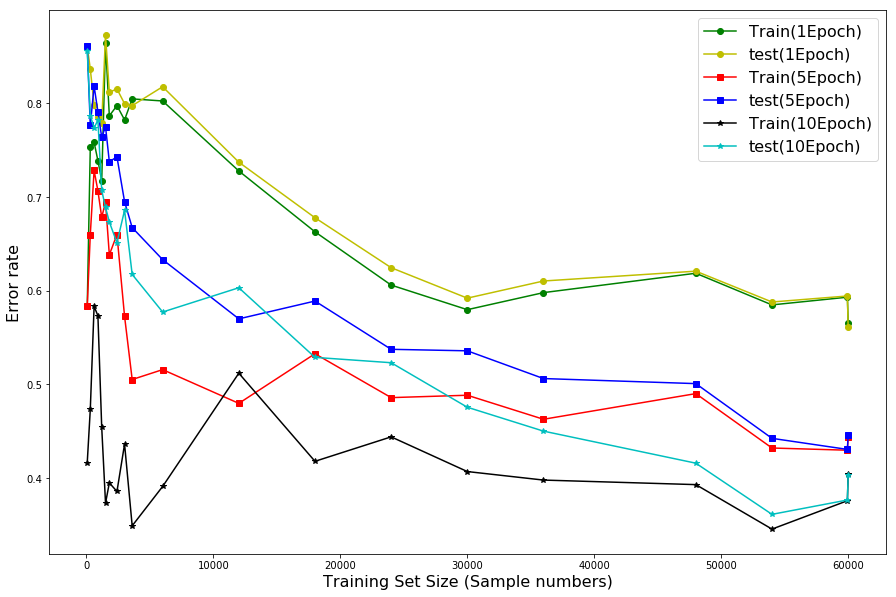

In [37]:
#Drawing learning curve
plt.figure(figsize = (15,10))
plt.plot(Train_size_list_1ep, Train_error_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, test_error_list_1ep, 'yo-', label = "test(1Epoch)")
plt.plot(Train_size_list_5ep, Train_error_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, test_error_list_5ep, 'bs-', label = "test(5Epoch)")
plt.plot(Train_size_list_10ep, Train_error_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, test_error_list_10ep, 'c*-', label = "test(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)
#plt.xlim(0,10000)

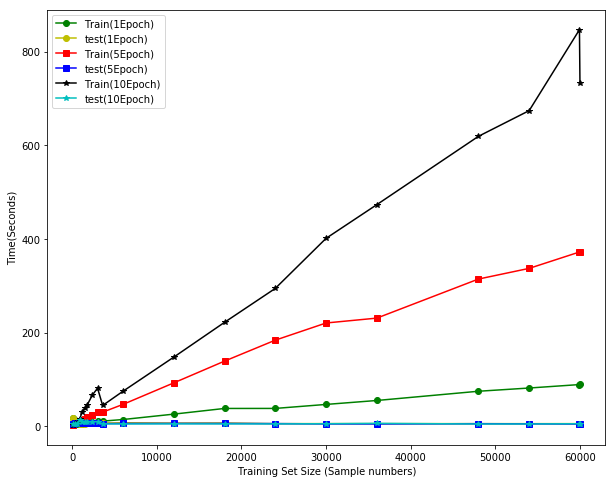

In [38]:
#Drawing train/val time v.s. training set

plt.figure(figsize = (10,8))
plt.plot(Train_size_list_1ep, Train_time_list_1ep, 'go-', label = "Train(1Epoch)")
plt.plot(Train_size_list_1ep, test_time_list_1ep, 'yo-', label = "test(1Epoch)")
plt.plot(Train_size_list_5ep, Train_time_list_5ep, 'rs-', label = "Train(5Epoch)")
plt.plot(Train_size_list_5ep, test_time_list_5ep, 'bs-', label = "test(5Epoch)")
plt.plot(Train_size_list_10ep, Train_time_list_10ep, 'k*-', label = "Train(10Epoch)")
plt.plot(Train_size_list_10ep, test_time_list_10ep, 'c*-', label = "test(10Epoch)")
 

plt.xlabel('Training Set Size (Sample numbers)')
plt.ylabel('Time(Seconds)')
plt.legend(loc="upper left", fontsize=10)

In [39]:
Nron_size_list_RELU = []
Train_error_list_RELU = []
test_error_list_RELU = []
Train_time_list_RELU = []
test_time_list_RELU = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_RELU.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-0)*1200) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_RELU.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf_nron.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    test_time_list_RELU.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_RELU.append(Train_error)
    test_error_list_RELU.append(test_error)
    
print("Nron_size_list_RELU: ", Nron_size_list_RELU)
print("Train_error_list_RELU: ", Train_error_list_RELU)
print("test_error_list_RELU: ", test_error_list_RELU)
print("Train_time_list_RELU: ", Train_time_list_RELU)
print("test_time_list_RELU: ", test_time_list_RELU)   

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpmga9qyon', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811AE85EF0>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op

INFO:tensorflow:global_step/sec: 209.16
INFO:tensorflow:step = 601, loss = 1.83813 (0.478 sec)
INFO:tensorflow:global_step/sec: 225.23
INFO:tensorflow:step = 701, loss = 1.55086 (0.444 sec)
INFO:tensorflow:global_step/sec: 194.718
INFO:tensorflow:step = 801, loss = 1.5956 (0.514 sec)
INFO:tensorflow:global_step/sec: 196.118
INFO:tensorflow:step = 901, loss = 1.48756 (0.510 sec)
INFO:tensorflow:global_step/sec: 202.623
INFO:tensorflow:step = 1001, loss = 1.34788 (0.494 sec)
INFO:tensorflow:global_step/sec: 217.401
INFO:tensorflow:step = 1101, loss = 1.43059 (0.460 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmppphr0l28\model.ckpt.
INFO:tensorflow:Loss for final step: 1.44431.
dnn_1_clf_nron training time 7.543205
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmppphr0l28\model.ckpt-1200
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmppphr0l28\model.ckpt-1200
Train error, test_error 0.

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp_k3cnt34\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.97548
INFO:tensorflow:global_step/sec: 108.123
INFO:tensorflow:step = 101, loss = 1.75039 (0.925 sec)
INFO:tensorflow:global_step/sec: 105.655
INFO:tensorflow:step = 201, loss = 1.65196 (0.946 sec)
INFO:tensorflow:global_step/sec: 108.788
INFO:tensorflow:step = 301, loss = 1.88958 (0.919 sec)
INFO:tensorflow:global_step/sec: 109.874
INFO:tensorflow:step = 401, loss = 2.117 (0.926 sec)
INFO:tensorflow:global_step/sec: 107.645
INFO:tensorflow:step = 501, loss = 1.69459 (0.915 sec)
INFO:tensorflow:global_step/sec: 109.891
INFO:tensorflow:step = 601, loss = 1.83365 (0.908 sec)
INFO:tensorflow:global_step/sec: 108.698
INFO:tensorflow:step = 701, loss = 1.48284 (0.920 sec)
INFO:tensorflow:global_step/sec: 107.353
INFO:tensorflow:step = 801, loss = 1.54524 (0.932 sec)
INFO:tensorflow:global_step/sec: 109.986
INFO

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp2be2fyka\model.ckpt.
INFO:tensorflow:step = 1, loss = 3.24241
INFO:tensorflow:global_step/sec: 68.9504
INFO:tensorflow:step = 101, loss = 1.8084 (1.449 sec)
INFO:tensorflow:global_step/sec: 67.668
INFO:tensorflow:step = 201, loss = 1.7165 (1.478 sec)
INFO:tensorflow:global_step/sec: 66.1586
INFO:tensorflow:step = 301, loss = 1.86788 (1.512 sec)
INFO:tensorflow:global_step/sec: 65.5452
INFO:tensorflow:step = 401, loss = 2.1693 (1.526 sec)
INFO:tensorflow:global_step/sec: 66.3823
INFO:tensorflow:step = 501, loss = 1.65139 (1.506 sec)
INFO:t

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpoo59dcqn\model.ckpt-1200
Train error, test_error 0.52032 / 0.5522
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpoc2ma6jq', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281188EF940>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow w

INFO:tensorflow:step = 401, loss = 2.19057 (2.288 sec)
INFO:tensorflow:global_step/sec: 42.3797
INFO:tensorflow:step = 501, loss = 1.72292 (2.360 sec)
INFO:tensorflow:global_step/sec: 40.2808
INFO:tensorflow:step = 601, loss = 1.87434 (2.488 sec)
INFO:tensorflow:global_step/sec: 40.5618
INFO:tensorflow:step = 701, loss = 1.4665 (2.460 sec)
INFO:tensorflow:global_step/sec: 41.2576
INFO:tensorflow:step = 801, loss = 1.59629 (2.424 sec)
INFO:tensorflow:global_step/sec: 43.6392
INFO:tensorflow:step = 901, loss = 1.47383 (2.292 sec)
INFO:tensorflow:global_step/sec: 43.1616
INFO:tensorflow:step = 1001, loss = 1.37465 (2.332 sec)
INFO:tensorflow:global_step/sec: 43.4472
INFO:tensorflow:step = 1101, loss = 1.50395 (2.286 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpuga2a9ln\model.ckpt.
INFO:tensorflow:Loss for final step: 1.54826.
dnn_1_clf_nron training time 30.059385
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpu

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpvptek4sl\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.95024
INFO:tensorflow:global_step/sec: 35.3386
INFO:tensorflow:step = 101, loss = 1.7873 (2.830 sec)
INFO:tensorflow:global_step/sec: 34.4096
INFO:tensorflow:step = 201, loss = 1.8336 (2.922 sec)
INFO:tensorflow:global_step/sec: 34.2475
INFO:tensorflow:step = 301, loss = 1.82277 (2.904 sec)
INFO:tensorflow:global_step/sec: 34.3072
INFO:tensorflow:step = 401, loss = 2.17997 (2.930 sec)
INFO:tensorflow:global_step/sec: 34.7517
INFO:tensorflow:step = 501, loss = 1.78327 (2.862 sec)
INFO:tensorflow:global_step/sec: 33.1279
INFO:tensorflow:step = 601, loss = 1.80373 (3.019 sec)
INFO:tensorflow:global_step/sec: 33.5039
INFO:tensorflow:step = 701, loss = 1.55766 (2.985 sec)
INFO:tensorflow:global_step/sec: 34.0224
INFO:tensorflow:step = 801, loss = 1.69674 (2.939 sec)
INFO:tensorflow:global_step/sec: 34.4466
INFO

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpx35nezff\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.82608
INFO:tensorflow:global_step/sec: 30.508
INFO:tensorflow:step = 101, loss = 1.78677 (3.278 sec)
INFO:tensorflow:global_step/sec: 29.3793
INFO:tensorflow:step = 201, loss = 1.7442 (3.404 sec)
INFO:tensorflow:global_step/sec: 29.2141
INFO:tensorflow:step = 301, loss = 1.85717 (3.423 sec)
INFO:tensorflow:global_step/sec: 29.6073
INFO:tensorflow:step = 401, loss = 2.17078 (3.382 sec)
INFO:tensorflow:global_step/sec: 29.4696
INFO:tensorflow:step = 501, loss = 1.74307 (3.405 sec)
INFO

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpqm3mawjw\model.ckpt-1200
Train error, test_error 0.54484 / 0.5755
Neuron_set_size: 5000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpcdc4ucg9', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281197530F0>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow 

INFO:tensorflow:global_step/sec: 3.12453
INFO:tensorflow:step = 401, loss = 2.51265 (32.005 sec)
INFO:tensorflow:global_step/sec: 3.03944
INFO:tensorflow:step = 501, loss = 2.38517 (32.916 sec)
INFO:tensorflow:global_step/sec: 3.02723
INFO:tensorflow:step = 601, loss = 2.10772 (33.018 sec)
INFO:tensorflow:global_step/sec: 3.05212
INFO:tensorflow:step = 701, loss = 1.84591 (32.764 sec)
INFO:tensorflow:global_step/sec: 3.01037
INFO:tensorflow:step = 801, loss = 1.9883 (33.219 sec)
INFO:tensorflow:global_step/sec: 3.00175
INFO:tensorflow:step = 901, loss = 1.90513 (33.318 sec)
INFO:tensorflow:global_step/sec: 3.00412
INFO:tensorflow:step = 1001, loss = 1.54408 (33.299 sec)
INFO:tensorflow:global_step/sec: 3.04262
INFO:tensorflow:step = 1101, loss = 1.75267 (32.851 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpuq4wh5i5\model.ckpt.
INFO:tensorflow:Loss for final step: 1.70742.
dnn_1_clf_nron training time 398.920591
INFO:tensorflow:Restoring para

In [40]:
Nron_size_list_SIGMO = []
Train_error_list_SIGMO = []
test_error_list_SIGMO = []
Train_time_list_SIGMO = []
test_time_list_SIGMO = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_SIGMO.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], activation_fn=tf.nn.sigmoid, n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-0)*1200) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_SIGMO.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf_nron.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    test_time_list_SIGMO.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_SIGMO.append(Train_error)
    test_error_list_SIGMO.append(test_error)
    
print("Nron_size_list_SIGMO: ", Nron_size_list_SIGMO)
print("Train_error_list_SIGMO: ", Train_error_list_SIGMO)
print("test_error_list_SIGMO: ", test_error_list_SIGMO)
print("Train_time_list_SIGMO: ", Train_time_list_SIGMO)
print("test_time_list_SIGMO: ", test_time_list_SIGMO)   

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpqzh83vvn', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028118F74898>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op

INFO:tensorflow:global_step/sec: 230.597
INFO:tensorflow:step = 601, loss = 1.85178 (0.434 sec)
INFO:tensorflow:global_step/sec: 230.968
INFO:tensorflow:step = 701, loss = 1.75626 (0.433 sec)
INFO:tensorflow:global_step/sec: 235.931
INFO:tensorflow:step = 801, loss = 1.75097 (0.424 sec)
INFO:tensorflow:global_step/sec: 235.529
INFO:tensorflow:step = 901, loss = 1.54636 (0.440 sec)
INFO:tensorflow:global_step/sec: 224.138
INFO:tensorflow:step = 1001, loss = 1.61051 (0.431 sec)
INFO:tensorflow:global_step/sec: 224.822
INFO:tensorflow:step = 1101, loss = 1.51098 (0.445 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmp52g41fc2\model.ckpt.
INFO:tensorflow:Loss for final step: 1.84092.
dnn_1_clf_nron training time 6.890422
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp52g41fc2\model.ckpt-1200
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmp52g41fc2\model.ckpt-1200
Train error, test_error

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmppjhi79z5\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.53529
INFO:tensorflow:global_step/sec: 115.991
INFO:tensorflow:step = 101, loss = 1.74766 (0.862 sec)
INFO:tensorflow:global_step/sec: 111.813
INFO:tensorflow:step = 201, loss = 1.77477 (0.894 sec)
INFO:tensorflow:global_step/sec: 112.803
INFO:tensorflow:step = 301, loss = 1.89821 (0.887 sec)
INFO:tensorflow:global_step/sec: 114.063
INFO:tensorflow:step = 401, loss = 2.23054 (0.892 sec)
INFO:tensorflow:global_step/sec: 113.152
INFO:tensorflow:step = 501, loss = 1.69601 (0.868 sec)
INFO:tensorflow:global_step/sec: 111.524
INFO:tensorflow:step = 601, loss = 1.83844 (0.897 sec)
INFO:tensorflow:global_step/sec: 116.387
INFO:tensorflow:step = 701, loss = 1.75262 (0.875 sec)
INFO:tensorflow:global_step/sec: 114.692
INFO:tensorflow:step = 801, loss = 1.80309 (0.856 sec)
INFO:tensorflow:global_step/sec: 113.937
IN

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpvlbxdcuc\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.6524
INFO:tensorflow:global_step/sec: 73.58
INFO:tensorflow:step = 101, loss = 1.78522 (1.363 sec)
INFO:tensorflow:global_step/sec: 72.5011
INFO:tensorflow:step = 201, loss = 1.83216 (1.375 sec)
INFO:tensorflow:global_step/sec: 72.9758
INFO:tensorflow:step = 301, loss = 1.90317 (1.386 sec)
INFO:tensorflow:global_step/sec: 72.6304
INFO:tensorflow:step = 401, loss = 2.22862 (1.364 sec)
INFO:tensorflow:global_step/sec: 71.3746
INFO:tensorflow:step = 501, loss = 1.68665 (1.398 sec)
INFO:

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpfm0ozi72\model.ckpt-1200
Train error, test_error 0.54788 / 0.5692
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpgeqw7v51', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028119673828>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow w

INFO:tensorflow:step = 401, loss = 2.27866 (2.249 sec)
INFO:tensorflow:global_step/sec: 44.9862
INFO:tensorflow:step = 501, loss = 1.72345 (2.236 sec)
INFO:tensorflow:global_step/sec: 44.9596
INFO:tensorflow:step = 601, loss = 1.88633 (2.209 sec)
INFO:tensorflow:global_step/sec: 44.7974
INFO:tensorflow:step = 701, loss = 1.79853 (2.232 sec)
INFO:tensorflow:global_step/sec: 44.876
INFO:tensorflow:step = 801, loss = 1.84082 (2.228 sec)
INFO:tensorflow:global_step/sec: 44.8696
INFO:tensorflow:step = 901, loss = 1.61258 (2.229 sec)
INFO:tensorflow:global_step/sec: 44.891
INFO:tensorflow:step = 1001, loss = 1.5746 (2.243 sec)
INFO:tensorflow:global_step/sec: 44.0186
INFO:tensorflow:step = 1101, loss = 1.52822 (2.256 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpb9ne0u_3\model.ckpt.
INFO:tensorflow:Loss for final step: 1.84912.
dnn_1_clf_nron training time 28.851382
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpb9n

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpbmdsiv2r\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.53817
INFO:tensorflow:global_step/sec: 39.2952
INFO:tensorflow:step = 101, loss = 2.03466 (2.560 sec)
INFO:tensorflow:global_step/sec: 38.6238
INFO:tensorflow:step = 201, loss = 1.863 (2.573 sec)
INFO:tensorflow:global_step/sec: 38.0246
INFO:tensorflow:step = 301, loss = 1.93567 (2.630 sec)
INFO:tensorflow:global_step/sec: 37.4217
INFO:tensorflow:step = 401, loss = 2.31473 (2.672 sec)
INFO:tensorflow:global_step/sec: 38.1528
INFO:tensorflow:step = 501, loss = 1.7687 (2.637 sec)
INFO:tensorflow:global_step/sec: 37.7123
INFO:tensorflow:step = 601, loss = 1.88038 (2.636 sec)
INFO:tensorflow:global_step/sec: 38.0549
INFO:tensorflow:step = 701, loss = 1.79178 (2.628 sec)
INFO:tensorflow:global_step/sec: 37.5125
INFO:tensorflow:step = 801, loss = 1.83927 (2.666 sec)
INFO:tensorflow:global_step/sec: 37.4367
INFO:

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpzgxzuz9h\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.47175
INFO:tensorflow:global_step/sec: 33.0136
INFO:tensorflow:step = 101, loss = 2.0549 (3.045 sec)
INFO:tensorflow:global_step/sec: 30.5971
INFO:tensorflow:step = 201, loss = 1.85743 (3.272 sec)
INFO:tensorflow:global_step/sec: 31.6731
INFO:tensorflow:step = 301, loss = 1.9723 (3.138 sec)
INFO:tensorflow:global_step/sec: 32.1488
INFO:tensorflow:step = 401, loss = 2.34144 (3.111 sec)
INFO:tensorflow:global_step/sec: 32.0797
INFO:tensorflow:step = 501, loss = 1.81225 (3.117 sec)
INFO

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpdyk81vn9\model.ckpt-1200
Train error, test_error 0.61148 / 0.6194
Neuron_set_size: 5000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpylqa8dmx', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811AEC3860>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow 

INFO:tensorflow:global_step/sec: 3.45912
INFO:tensorflow:step = 401, loss = 10.1902 (28.909 sec)
INFO:tensorflow:global_step/sec: 3.48908
INFO:tensorflow:step = 501, loss = 7.19392 (28.661 sec)
INFO:tensorflow:global_step/sec: 3.47751
INFO:tensorflow:step = 601, loss = 8.32413 (28.772 sec)
INFO:tensorflow:global_step/sec: 3.47067
INFO:tensorflow:step = 701, loss = 4.91009 (28.799 sec)
INFO:tensorflow:global_step/sec: 3.47087
INFO:tensorflow:step = 801, loss = 9.90161 (28.809 sec)
INFO:tensorflow:global_step/sec: 3.49236
INFO:tensorflow:step = 901, loss = 6.28326 (28.634 sec)
INFO:tensorflow:global_step/sec: 3.47671
INFO:tensorflow:step = 1001, loss = 3.46177 (28.763 sec)
INFO:tensorflow:global_step/sec: 3.49199
INFO:tensorflow:step = 1101, loss = 4.39042 (28.637 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpwi2agzht\model.ckpt.
INFO:tensorflow:Loss for final step: 6.62656.
dnn_1_clf_nron training time 349.436521
INFO:tensorflow:Restoring par

In [41]:
Nron_size_list_TANH = []
Train_error_list_TANH = []
test_error_list_TANH = []
Train_time_list_TANH = []
test_time_list_TANH = []

from sklearn.model_selection import train_test_split

for j in [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000,3000,5000,8000,10000]:

    Nron_size_list_TANH.append(j)
    print('Neuron_set_size:', j)
    
    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_train_scaled, y_train, test_size = 0, random_state = 42)
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf_nron = tf.contrib.learn.DNNClassifier(hidden_units=[j], activation_fn=tf.nn.tanh, n_classes=10, feature_columns=feature_columns, config=config)
    dnn_1_clf_nron = tf.contrib.learn.SKCompat(dnn_1_clf_nron) # if TensorFlow >= 1.1
    #dnn_1_clf.fit(X_train_partial, y_train_partial, batch_size=50, max_steps=40000)
    
    start=datetime.now()
    dnn_1_clf_nron.fit(X_train_scaled_partial, y_train_partial, batch_size=50, steps=((1-0)*1200) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf_nron training time', Train_elapse)
    Train_time_list_TANH.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf_nron.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    
    
    #print(dnn_1_clf.score(X_train_partial))##doesn't work. it has no score method

   
    start=datetime.now()
    y_test_pred =  dnn_1_clf_nron.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    #print('dnn_1_clf val time', Val_elapse)
    test_time_list_TANH.append(test_elapse)
    
    test_error = 1 - accuracy_score(y_test, y_test_pred['classes'])
    #Val_error = 1 - cross_val_score(dnn_1_clf, X_train_partial, y_train_partial, n_jobs = 3, cv=3, scoring="accuracy").mean()  
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_TANH.append(Train_error)
    test_error_list_TANH.append(test_error)
    
print("Nron_size_list_TANH: ", Nron_size_list_TANH)
print("Train_error_list_TANH: ", Train_error_list_TANH)
print("test_error_list_TANH: ", test_error_list_TANH)
print("Train_time_list_TANH: ", Train_time_list_TANH)
print("test_time_list_TANH: ", test_time_list_TANH)  

Neuron_set_size: 10
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp0c0zeqmq', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281176A0320>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op

INFO:tensorflow:global_step/sec: 215.247
INFO:tensorflow:step = 601, loss = 1.84381 (0.480 sec)
INFO:tensorflow:global_step/sec: 213.209
INFO:tensorflow:step = 701, loss = 1.86926 (0.453 sec)
INFO:tensorflow:global_step/sec: 217.008
INFO:tensorflow:step = 801, loss = 1.7916 (0.461 sec)
INFO:tensorflow:global_step/sec: 210.866
INFO:tensorflow:step = 901, loss = 1.62161 (0.474 sec)
INFO:tensorflow:global_step/sec: 208.759
INFO:tensorflow:step = 1001, loss = 1.63453 (0.479 sec)
INFO:tensorflow:global_step/sec: 214.767
INFO:tensorflow:step = 1101, loss = 1.59679 (0.466 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpneh9_b0m\model.ckpt.
INFO:tensorflow:Loss for final step: 1.97626.
dnn_1_clf_nron training time 7.655489
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpneh9_b0m\model.ckpt-1200
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpneh9_b0m\model.ckpt-1200
Train error, test_error 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp9o63pqg2\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.69182
INFO:tensorflow:global_step/sec: 106.949
INFO:tensorflow:step = 101, loss = 1.78227 (0.939 sec)
INFO:tensorflow:global_step/sec: 104.33
INFO:tensorflow:step = 201, loss = 1.83324 (0.970 sec)
INFO:tensorflow:global_step/sec: 100.844
INFO:tensorflow:step = 301, loss = 1.93211 (0.976 sec)
INFO:tensorflow:global_step/sec: 76.0824
INFO:tensorflow:step = 401, loss = 2.32077 (1.314 sec)
INFO:tensorflow:global_step/sec: 82.0853
INFO:tensorflow:step = 501, loss = 1.79457 (1.218 sec)
INFO:tensorflow:global_step/sec: 96.6376
INFO:tensorflow:step = 601, loss = 1.89843 (1.035 sec)
INFO:tensorflow:global_step/sec: 91.0892
INFO:tensorflow:step = 701, loss = 1.79115 (1.098 sec)
INFO:tensorflow:global_step/sec: 90.673
INFO:tensorflow:step = 801, loss = 1.89529 (1.103 sec)
INFO:tensorflow:global_step/sec: 96.3367
INFO

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp0d3mwrh0\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.84931
INFO:tensorflow:global_step/sec: 67.7177
INFO:tensorflow:step = 101, loss = 1.8707 (1.477 sec)
INFO:tensorflow:global_step/sec: 52.236
INFO:tensorflow:step = 201, loss = 1.87189 (1.930 sec)
INFO:tensorflow:global_step/sec: 65.6769
INFO:tensorflow:step = 301, loss = 1.84508 (1.525 sec)
INFO:tensorflow:global_step/sec: 65.8541
INFO:tensorflow:step = 401, loss = 2.14836 (1.516 sec)
INFO:tensorflow:global_step/sec: 64.5997
INFO:tensorflow:step = 501, loss = 1.80245 (1.548 sec)
INFO

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpp93z9pit\model.ckpt-1200
Train error, test_error 0.54666 / 0.5884
Neuron_set_size: 550
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmp17cs6viv', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000281180B30B8>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow w

INFO:tensorflow:step = 401, loss = 2.22216 (2.401 sec)
INFO:tensorflow:global_step/sec: 42.7471
INFO:tensorflow:step = 501, loss = 1.7314 (2.339 sec)
INFO:tensorflow:global_step/sec: 42.4584
INFO:tensorflow:step = 601, loss = 1.85652 (2.355 sec)
INFO:tensorflow:global_step/sec: 43.5338
INFO:tensorflow:step = 701, loss = 1.80379 (2.297 sec)
INFO:tensorflow:global_step/sec: 43.4132
INFO:tensorflow:step = 801, loss = 1.95779 (2.319 sec)
INFO:tensorflow:global_step/sec: 43.0488
INFO:tensorflow:step = 901, loss = 1.60731 (2.323 sec)
INFO:tensorflow:global_step/sec: 42.5123
INFO:tensorflow:step = 1001, loss = 1.60235 (2.337 sec)
INFO:tensorflow:global_step/sec: 42.4625
INFO:tensorflow:step = 1101, loss = 1.51339 (2.371 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmpzbtdbeb7\model.ckpt.
INFO:tensorflow:Loss for final step: 1.82953.
dnn_1_clf_nron training time 30.393016
INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpz

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmp3mo11js4\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.7137
INFO:tensorflow:global_step/sec: 33.3931
INFO:tensorflow:step = 101, loss = 1.96278 (2.995 sec)
INFO:tensorflow:global_step/sec: 32.4173
INFO:tensorflow:step = 201, loss = 1.9848 (3.069 sec)
INFO:tensorflow:global_step/sec: 34.464
INFO:tensorflow:step = 301, loss = 1.92254 (2.902 sec)
INFO:tensorflow:global_step/sec: 34.2646
INFO:tensorflow:step = 401, loss = 2.30001 (2.918 sec)
INFO:tensorflow:global_step/sec: 32.4306
INFO:tensorflow:step = 501, loss = 1.85409 (3.084 sec)
INFO:tensorflow:global_step/sec: 35.5635
INFO:tensorflow:step = 601, loss = 1.85498 (2.812 sec)
INFO:tensorflow:global_step/sec: 35.91
INFO:tensorflow:step = 701, loss = 1.82906 (2.785 sec)
INFO:tensorflow:global_step/sec: 36.0453
INFO:tensorflow:step = 801, loss = 1.91293 (2.774 sec)
INFO:tensorflow:global_step/sec: 35.744
INFO:ten

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\prane\AppData\Local\Temp\tmpw29l5dkc\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.50982
INFO:tensorflow:global_step/sec: 30.7238
INFO:tensorflow:step = 101, loss = 2.02405 (3.255 sec)
INFO:tensorflow:global_step/sec: 30.9467
INFO:tensorflow:step = 201, loss = 1.8976 (3.231 sec)
INFO:tensorflow:global_step/sec: 30.1383
INFO:tensorflow:step = 301, loss = 2.02553 (3.334 sec)
INFO:tensorflow:global_step/sec: 30.4359
INFO:tensorflow:step = 401, loss = 2.34116 (3.270 sec)
INFO:tensorflow:global_step/sec: 29.8123
INFO:tensorflow:step = 501, loss = 1.87222 (3.370 sec)
INF

INFO:tensorflow:Restoring parameters from C:\Users\prane\AppData\Local\Temp\tmpfjkhh5hr\model.ckpt-1200
Train error, test_error 0.59534 / 0.6187
Neuron_set_size: 5000
INFO:tensorflow:Using config: {'_save_summary_steps': 100, '_log_step_count_steps': 100, '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_worker_replicas': 0, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': None, '_task_id': 0, '_model_dir': 'C:\\Users\\prane\\AppData\\Local\\Temp\\tmpetzps8jn', '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': 42, '_save_checkpoints_steps': None, '_master': '', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002811830DB70>}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow 

INFO:tensorflow:global_step/sec: 3.02867
INFO:tensorflow:step = 401, loss = 3.05828 (33.033 sec)
INFO:tensorflow:global_step/sec: 3.02087
INFO:tensorflow:step = 501, loss = 2.51413 (33.087 sec)
INFO:tensorflow:global_step/sec: 3.02115
INFO:tensorflow:step = 601, loss = 2.46993 (33.100 sec)
INFO:tensorflow:global_step/sec: 2.9773
INFO:tensorflow:step = 701, loss = 2.04303 (33.587 sec)
INFO:tensorflow:global_step/sec: 3.04344
INFO:tensorflow:step = 801, loss = 2.52901 (32.873 sec)
INFO:tensorflow:global_step/sec: 3.05516
INFO:tensorflow:step = 901, loss = 2.08075 (32.716 sec)
INFO:tensorflow:global_step/sec: 3.02744
INFO:tensorflow:step = 1001, loss = 2.14231 (33.038 sec)
INFO:tensorflow:global_step/sec: 3.03193
INFO:tensorflow:step = 1101, loss = 1.87162 (32.975 sec)
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\prane\AppData\Local\Temp\tmp1ob3u4oc\model.ckpt.
INFO:tensorflow:Loss for final step: 2.31595.
dnn_1_clf_nron training time 407.111878
INFO:tensorflow:Restoring para

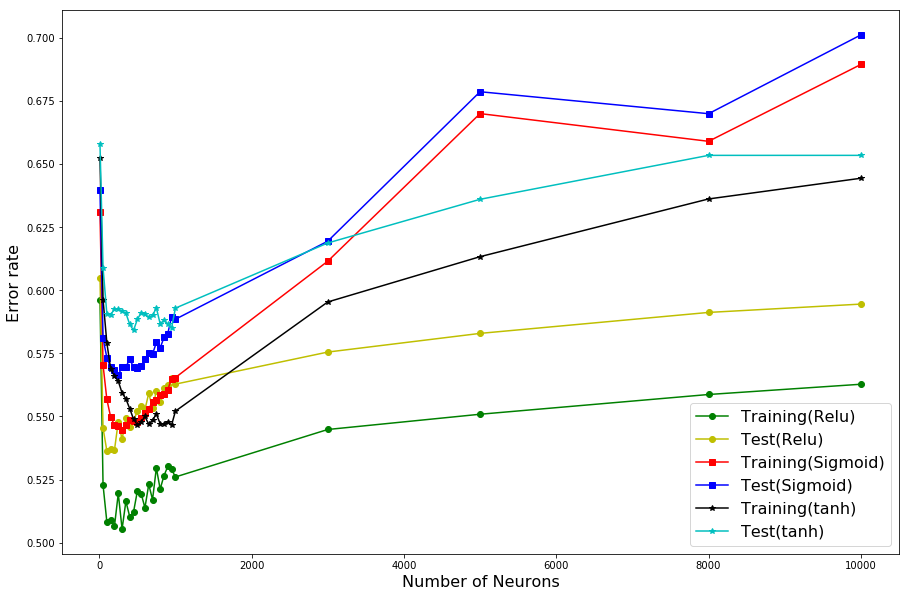

In [49]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, test_error_list_RELU, 'yo-', label = "Test(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, test_error_list_SIGMO, 'bs-', label = "Test(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, test_error_list_TANH, 'c*-', label = "Test(tanh)")

plt.xlabel('Number of Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(fontsize=16)

(0, 1000)

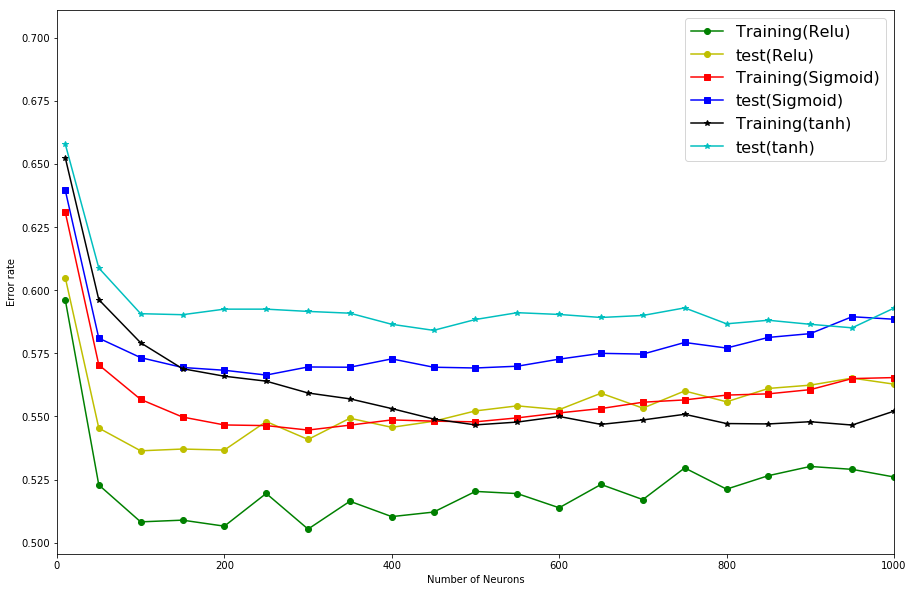

In [50]:
plt.figure(figsize = (15,10))
plt.plot(Nron_size_list_RELU, Train_error_list_RELU, 'go-', label = "Training(Relu)")
plt.plot(Nron_size_list_RELU, test_error_list_RELU, 'yo-', label = "test(Relu)")
plt.plot(Nron_size_list_SIGMO, Train_error_list_SIGMO, 'rs-', label = "Training(Sigmoid)")
plt.plot(Nron_size_list_SIGMO, test_error_list_SIGMO, 'bs-', label = "test(Sigmoid)") 
plt.plot(Nron_size_list_TANH, Train_error_list_TANH, 'k*-', label = "Training(tanh)")
plt.plot(Nron_size_list_TANH, test_error_list_TANH, 'c*-', label = "test(tanh)")

plt.xlabel('Number of Neurons')
plt.ylabel('Error rate')
plt.legend(fontsize=16)
plt.xlim(0, 1000)